# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.614  1  0.953 0.330 0.005   
                             age        0.247  1  0.382 0.537 0.002   
                             Kiel       2.874  1  4.458 0.036 0.023   
                             Magdeburg  5.398  1  8.372 0.004 0.042   
                             Sweden     9.204  1 14.276 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.002  1  0.002 0.968 0.000   
                             age        0.652  1  0.674 0.413 0.004   
                             Kiel       0.358  1  0.370 0.544 0.002   
                             Magdeburg  4.929  1  5.095 0.025 0.026   
                             Sweden    11.407  1 11.791 0.001 0.058   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.481  0.496    False  
                             age               0.270  0.685    False  
                             Kiel              1.443  0.094    False  
                             Magdeburg         2.371  0.017     True  
                             Sweden            3.676  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.014  0.982    False  
                             age               0.384  0.573    False  
                             Kiel              0.265  0.689    False  
                             Magdeburg         1.600  0.071    False  
                             Sweden            3.137  0.004     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.056  1  7.538 0.007 0.038   
                             age        0.002  1  0.016 0.900 0.000   
                             Kiel       0.277  1  1.976 0.161 0.010   
                             Magdeburg  0.552  1  3.935 0.049 0.020   
                             Sweden     1.867  1 13.321 0.000 0.065   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.949  1  4.875 0.028 0.025   
                             age        0.277  1  0.458 0.500 0.002   
                             Kiel       3.361  1  5.556 0.019 0.028   
                             Magdeburg  4.024  1  6.653 0.011 0.034   
                             Sweden    31.578  1 52.212 0.000 0.215   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.179  0.019     True  
                             age               0.046  0.937    False  
                             Kiel              0.792  0.264    False  
                             Magdeburg         1.312  0.101    False  
                             Sweden            3.470  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.546  0.065    False  
                             age               0.301  0.622    False  
                             Kiel              1.712  0.047     True  
                             Magdeburg         1.973  0.028     True  
                             Sweden           10.936  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.179  0.019     True   
                             age       0.900         0.046  0.937    False   
                             Kiel      0.161         0.792  0.264    False   
                             Magdeburg 0.049         1.312  0.101    False   
                             Sweden    0.000         3.470  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.028         1.546  0.065    False   
                             age       0.500         0.301  0.622    False   
                             Kiel      0.019         1.712  0.047     True   
                             Magdeburg 0.011         1.973  0.028     True   
                             Sweden    0.000        10.936  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.330         0.481  0.496    False  
                             age       0.537         0.270  0.685    False  
                             Kiel      0.036         1.443  0.094    False  
                             Magdeburg 0.004         2.371  0.017     True  
                             Sweden    0.000         3.676  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.968         0.014  0.982    False  
                             age       0.413         0.384  0.573    False  
                             Kiel      0.544         0.265  0.689    False  
                             Magdeburg 0.025         1.600  0.071    False  
                             Sweden    0.001         3.137  0.004     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.224         3.324     0.277     0.262         2.479     0.338
std       0.294         6.331     0.321     0.304         5.348     0.332
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.000         0.408     0.002     0.004         0.333     0.015
50%       0.061         1.218     0.121     0.119         0.924     0.238
75%       0.390         3.333     0.520     0.465         2.427     0.619
max       0.999        86.633     0.999     1.000       149.381     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.179   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.505   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.183         0.737   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.254         0.595   
A0A075B6H7                                         AD     0.075         1.128   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.325         0.488   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.641         0.193   
S4R3U6                                             AD     0.028         1.546   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.019     True   
A0A024R0T9;K7ER74;P02655                           AD      0.070    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.292    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.378    False   
A0A075B6H7                                         AD      0.143    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.282    False   
Q9Y6X5                                             AD      0.456    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.156    False   
Q9Y6Y9                                             AD      0.745    False   
S4R3U6                                             AD      0.065    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.330         0.481   
A0A024R0T9;K7ER74;P02655                           AD     0.039         1.411   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.129         0.888   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.539         0.269   
A0A075B6H7                                         AD     0.075         1.128   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.010         2.021   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.096         1.019   
S4R3U6                                             AD     0.968         0.014   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.496    False  
A0A024R0T9;K7ER74;P02655                           AD      0.100    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.253    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.685    False  
A0A075B6H7                                         AD      0.166    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.244         1.598     0.304     0.255         1.403     0.337
std       0.297         1.898     0.320     0.293         1.624     0.319
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.007         0.373     0.019     0.011         0.356     0.037
50%       0.094         1.026     0.173     0.116         0.935     0.234
75%       0.424         2.179     0.553     0.441         1.950     0.600
max       0.998        24.856     0.998     0.998        22.459     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,939,1026


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.007         2.179  0.019   
A0A024R0T9;K7ER74;P02655                           0.031         1.505  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.183         0.737  0.292   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.254         0.595  0.378   
A0A075B6H7                                         0.075         1.128  0.143   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.282   
Q9Y6X5                                             0.325         0.488  0.456   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.156   
Q9Y6Y9                                             0.641         0.193  0.745   
S4R3U6                                             0.028         1.546  0.065   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.330   
A0A024R0T9;K7ER74;P02655                              False 0.039   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.129   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.539   
A0A075B6H7                                            False 0.075   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.010   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.096   
S4R3U6                                                False 0.968   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.481  0.496   
A0A024R0T9;K7ER74;P02655                                   1.411  0.100   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.888  0.253   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.269  0.685   
A0A075B6H7                                                 1.128  0.166   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     2.021  0.032   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     1.019  0.202   
S4R3U6                                                     0.014  0.982   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                 True       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    881
DAE (yes) - PI (yes)   337
DAE (yes) - PI (no)    145
DAE (no)  - PI (yes)    58
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.007         2.179  0.019     True 0.330   
A0A075B6I0                   0.001         3.218  0.002     True 0.019   
A0A075B6J9                   0.011         1.979  0.028     True 0.038   
A0A075B6R2                   0.001         3.272  0.002     True 0.357   
A0A075B6S5                   0.007         2.181  0.019     True 0.091   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.862         0.064  0.912    False 0.009   
Q9UP79                       0.000         4.277  0.000     True 0.366   
Q9UQ52                       0.000         3.494  0.001     True 0.092   
Q9Y6C2                       0.001         3.140  0.003     True 0.800   
Q9Y6X5                       0.325         0.488  0.456    False 0.010   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.481  0.496    False       186  
A0A075B6I0                           1.720  0.057    False       194  
A0A075B6J9                           1.421  0.098    False       156  
A0A075B6R2                           0.447  0.519    False       164  
A0A075B6S5                           1.042  0.194    False       129  
...                                    ...    ...      ...       ...  
Q9UNW1                               2.043  0.031     True       171  
Q9UP79                               0.437  0.528    False       135  
Q9UQ52                               1.035  0.197    False       188  
Q9Y6C2                               0.097  0.881    False       119  
Q9Y6X5                               2.021  0.032     True       173  

[203 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.019,0.496,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.070,0.100,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.292,0.253,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.378,0.685,196,DAE (no) - PI (no)
A0A075B6H7,0.143,0.166,91,DAE (no) - PI (no)
...,...,...,...,...
Q9Y6R7,0.282,0.316,197,DAE (no) - PI (no)
Q9Y6X5,0.456,0.032,173,DAE (no) - PI (yes)
Q9Y6Y8;Q9Y6Y8-2,0.156,0.182,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
O15204;O15204-2,0.011,0.996,156,DAE (yes) - PI (no),0.986
A0A087X152;D6RE16;E0CX15;O95185;O95185-2,0.988,0.035,176,DAE (no) - PI (yes),0.953
K7EQG1;Q9NXS2;Q9NXS2-3,0.027,0.973,53,DAE (yes) - PI (no),0.946
P42262;P42262-2;P42262-3,0.013,0.945,87,DAE (yes) - PI (no),0.932
A6NCT7;Q07092;Q07092-2,0.009,0.936,147,DAE (yes) - PI (no),0.927
...,...,...,...,...,...
A0A0J9YXX1,0.047,0.058,197,DAE (yes) - PI (no),0.011
Q9NX62,0.045,0.056,197,DAE (yes) - PI (no),0.011
P00740;P00740-2,0.043,0.053,197,DAE (yes) - PI (no),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


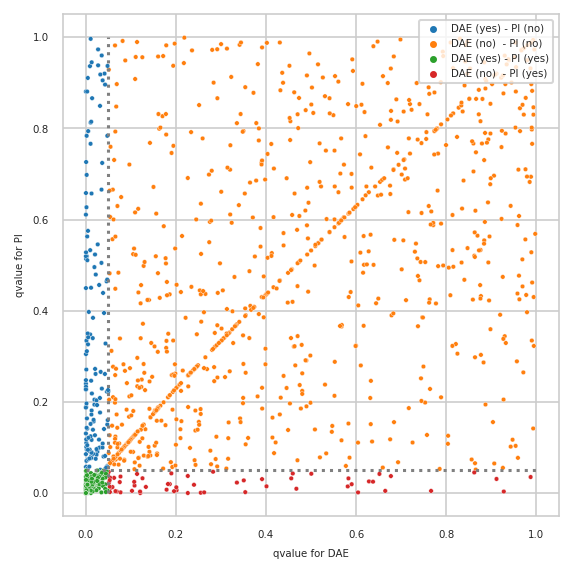

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


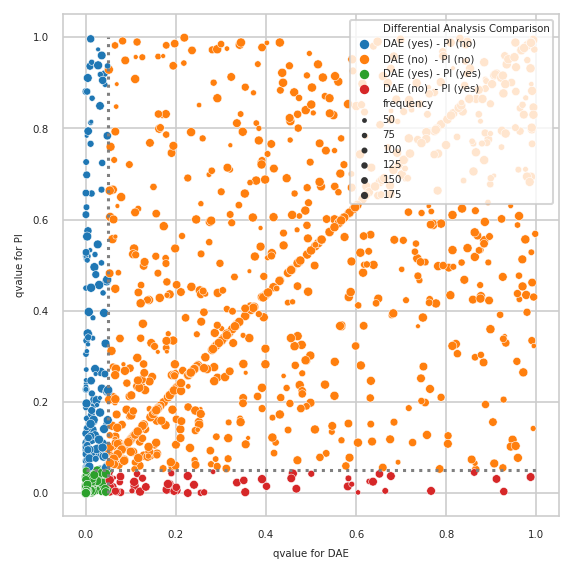

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out